### Learning Curve

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
import numpy as np
import os

# define some random data that emulates your indeded code:
NCURVES = 8
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Blues_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=blues)

NCURVES = 10
curves = [i for i in range(NCURVES)]
values = range(NCURVES)
blues = plt.get_cmap('Greens_r') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap_g = cmx.ScalarMappable(norm=cNorm, cmap=blues)

params = {
    "text.usetex": True,
    "font.family": "serif",
    "legend.fontsize": 20,
    "axes.labelsize": 22,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "lines.linewidth": 3,
    "lines.markeredgewidth": 0.8,
    "lines.markersize": 0.1,
    "lines.marker": "o",
    "patch.edgecolor": "black",
}
plt.rcParams.update(params)
plt.style.use("seaborn-deep")


In [2]:
path = "GHZ/"
# load the AL data
ALdata = {}
for folder in os.listdir(path):
    if os.path.isdir(path+"/"+folder) and folder!= "__pycache__":
        print(folder)
        # load data
        data = {}
        data["KL"] = pd.read_csv(path+"/"+folder + "/KL.csv")
        try:
            data["KL Qucumber"] = pd.read_csv(path+"/"+folder+ "/KL(Qucumber).csv")
            data["rescaled fidelity"] = pd.read_csv(path+"/"+folder + "/rescaled_fidelity.csv")
        except OSError:
            pass
        data["total density"] = pd.read_csv(path+"/"+folder + "/total_density.csv")
        data["density difference"] = pd.read_csv(path+"/"+folder + "/density_difference.csv")
        data["correlator difference"] = pd.read_csv(path+"/"+folder + "/correlator_difference.csv")
        #data["sigmax difference"] = pd.read_csv(path+"/"+folder + "/sigmax_difference.csv")
        ALdata[folder.split("_")[0]] = data
        print(data.keys())


# load baseline data
baseline_data = {}
for folder in os.listdir(path):
    if os.path.isdir(path+"/"+folder) and folder!= "__pycache__" and folder!= "Training_data":
        print(folder)
        # load data
        data = {}
        data["KL"] = pd.read_csv(path+"/"+folder + "/baseline_KL.csv")
        try:
            data["KL Qucumber"] = pd.read_csv(path+"/"+folder+ "/baseline_KL(Qucumber).csv")
            data["rescaled fidelity"] = pd.read_csv(path+"/"+folder + "/baseline_rescaled_fidelity.csv")
        except OSError:
            pass
        data["total density"] = pd.read_csv(path+"/"+folder + "/baseline_total_density.csv")
        try:
            data["density difference"] = pd.read_csv(path+"/"+folder + "/baseline_density_difference.csv")
            data["correlator difference"] = pd.read_csv(path+"/"+folder + "/baseline_correlator_difference.csv")
            #data["sigmax difference"] = pd.read_csv(path+"/"+folder + "/baseline_sigmax_difference.csv")
        except FileNotFoundError:
            pass
        baseline_data[folder.split("_")[0]] = data
        print(data.keys())
print(ALdata.keys())
print(baseline_data.keys())




15_qubits
dict_keys(['KL', 'KL Qucumber', 'rescaled fidelity', 'total density', 'density difference', 'correlator difference'])
5_qubits
dict_keys(['KL', 'KL Qucumber', 'rescaled fidelity', 'total density', 'density difference', 'correlator difference'])
7_qubits
dict_keys(['KL', 'KL Qucumber', 'rescaled fidelity', 'total density', 'density difference', 'correlator difference'])
9_qubits
dict_keys(['KL', 'KL Qucumber', 'rescaled fidelity', 'total density', 'density difference', 'correlator difference'])
15_qubits
dict_keys(['KL', 'KL Qucumber', 'rescaled fidelity', 'total density', 'density difference', 'correlator difference'])
5_qubits
dict_keys(['KL', 'KL Qucumber', 'rescaled fidelity', 'total density', 'density difference', 'correlator difference'])
7_qubits
dict_keys(['KL', 'KL Qucumber', 'rescaled fidelity', 'total density', 'density difference', 'correlator difference'])
9_qubits
dict_keys(['KL', 'KL Qucumber', 'rescaled fidelity', 'total density', 'density difference', 'correla

   XZZZYXYYZ 
0  YXZXZYXZZ 
1  YZYYXXZXY 
2  XZZXZXYXY 
3  YXXXXZYZZ 
4  XXXXXZZYX 
5  ZXZZYYYXZ 
6  YYZXYYYZZ 
7  XXYZXXYXY 
8  YXZXYZYXZ 
9  ZZZZZZZZZ 


ValueError: x and y must have same first dimension, but have shapes (110,) and (10,)

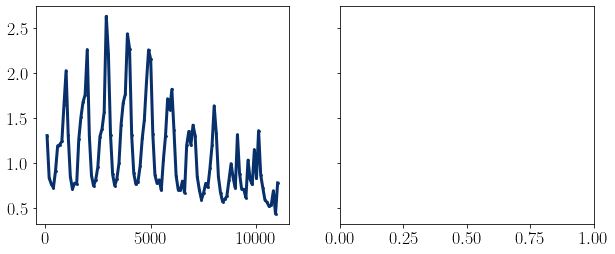

In [3]:
query_samples = "9"

data = ALdata[query_samples]
if path.split("/")[0][:3]=="LGT":
    d = {path.split("/")[0]:"LatticeGaugeModel/1samples/query_by_amplitude_and_phase/baseline"}
else:
    d = {path.split("/")[0]:path.split("/")[0].split("_")[0]+"/1samples/query_by_amplitude_and_phase/baseline"}
#fig, ax = plt.subplots(len(list(data.keys())), 2, figsize=(5,len(list(data.keys()))*3))
samples = pd.read_csv(path + "/"+query_samples+"_qubits/Training_data/"+d[path.split("/")[0]]+"/samples.txt")
num_samples = str(len(samples))
bases = pd.read_csv(path + "/"+query_samples+"_qubits/Training_data/"+d[path.split("/")[0]]+"/bases.txt")
print(bases)
num_bases = str(len(bases)+1)
#fig.suptitle(path + "("+num_samples+" samples, "+num_bases+" configurations)", fontsize= 20)
for q, quantity in enumerate(list(data.keys())):
    fig, ax = plt.subplots(1, 2, figsize=(10,4), sharey = True)
    for RBM in enumerate(list(data[quantity].columns)[1:]):
        x= (data[quantity][RBM[1]].index+1)*100
        if quantity == "rescaled fidelity":
            ax[0].plot(x, 1-data[quantity][RBM[1]], "-o", markersize = 2, color = scalarMap.to_rgba(values[int(RBM[1])]))
            ax[1].plot(x, 1-baseline_data[query_samples][quantity][RBM[1]], "-o", markersize = 2, color = scalarMap_g.to_rgba(values[int(RBM[1])]))
        elif quantity == "total density":
            target_density = pd.read_csv(path + "/"+query_samples+"_qubits/target_total_density.csv", header=None)
            print(target_density)
            td = (complex(target_density[0][0].split("(")[-1].split(")")[0]).real)
            print(td)
            target_density = np.ones(len(data[quantity][RBM[1]]))*td
            target_density1 = np.ones(len(baseline_data[query_samples][quantity][RBM[1]]))*td
            ax[0].plot(x, data[quantity][RBM[1]]-target_density, color = scalarMap.to_rgba(values[int(RBM[1])]))
            ax[1].plot(x, baseline_data[query_samples][quantity][RBM[1]]-target_density1, color = scalarMap_g.to_rgba(values[int(RBM[1])]))
        else:
            ax[0].plot(x, data[quantity][RBM[1]], "-o", markersize = 2, color = scalarMap.to_rgba(values[int(RBM[1])]))
            ax[1].plot(x, baseline_data[query_samples][quantity][RBM[1]], "-o", markersize = 2, color = scalarMap_g.to_rgba(values[int(RBM[1])]))

    if quantity == "rescaled fidelity":
        ax[0].set_ylabel(r"$1-f^{1/N}$")
    elif quantity == "total density":
        ax[0].set_ylabel(r"$n-n_{\mathrm{target}}$")
    elif quantity == "density difference":
        ax[0].set_ylabel(r"$\vert \vec{n}-\vec{n}_{\mathrm{target}}\vert$")
    elif quantity == "correlator difference":
        ax[0].set_ylabel(r"$\vert \vec{c}-\vec{c}_{\mathrm{target}}\vert$")
    else: ax[0].set_ylabel(quantity)
    ax[0].set_xlabel("Epochs")
    #ax[1].set_ylabel(quantity)
    ax[1].set_xlabel("Epochs")
    #ax[0].set_title(quantity + " with active learning", fontsize=16)
    #ax[1].set_title("baseline "+quantity, fontsize=16)
    #ax[q].legend()
    plt.sca(ax[ 0])
    #plt.xticks(np.arange(0, len(data[quantity][RBM[1]])+1, int(len(data[quantity][RBM[1]])/10)), np.arange(0, len(data[quantity][RBM[1]])+1, int(len(data[quantity][RBM[1]])/10))*100)
    plt.sca(ax[1])
    
    #plt.xticks(np.arange(0, len(baseline_data[query_samples][quantity][RBM[1]])+1, int(len(baseline_data[query_samples][quantity][RBM[1]])/10)), np.arange(0, len(baseline_data[query_samples][quantity][RBM[1]])+1, int(len(baseline_data[query_samples][quantity][RBM[1]])/10))*100)
    plt.tight_layout()
    plt.subplots_adjust(hspace=0)
    plt.savefig(path+path.split("/")[0]+"_"+quantity+"_"+query_samples+"_qubits_summary.pdf", dpi=1000)
    plt.show()

   XZZZYXYYZ 
0  YXZXZYXZZ 
1  YZYYXXZXY 
2  XZZXZXYXY 
3  YXXXXZYZZ 
4  XXXXXZZYX 
5  ZXZZYYYXZ 
6  YYZXYYYZZ 
7  XXYZXXYXY 
8  YXZXYZYXZ 
9  ZZZZZZZZZ 
10
[0.6789943762385376, 0.7915264309594507, 0.7632502707840106, 0.8104439025878647]


C:\Users\hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:31: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.
C:\Users\hanna\anaconda3\lib\site-packages\ipykernel_launcher.py:37: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-o" (-> linestyle='-'). The keyword argument will take precedence.


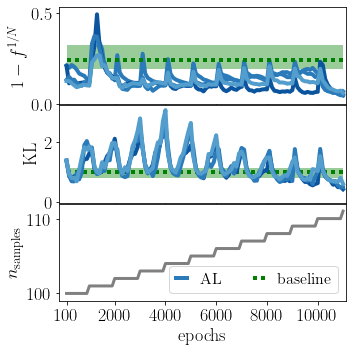

In [13]:
query_samples = "9"

data = ALdata[query_samples]
if path.split("/")[0][:3]=="LGT":
    d = {path.split("/")[0]:"LatticeGaugeModel/1samples/query_by_amplitude_and_phase/baseline"}
else:
    d = {path.split("/")[0]:path.split("/")[0].split("_")[0]+"/1samples/query_by_amplitude_and_phase/baseline"}
#fig, ax = plt.subplots(len(list(data.keys())), 2, figsize=(5,len(list(data.keys()))*3))
samples = pd.read_csv(path + "/"+query_samples+"_qubits/Training_data/"+d[path.split("/")[0]]+"/samples.txt")
num_samples = str(len(samples)+1)
bases = pd.read_csv(path + "/"+query_samples+"_qubits/Training_data/"+d[path.split("/")[0]]+"/bases.txt")
print(bases)
num_bases = str(len(bases))
print(num_bases)
#fig.suptitle(path + "("+num_samples+" samples, "+num_bases+" configurations)", fontsize= 20)
fig, ax= plt.subplots(3,1,figsize=(5,5), sharex=True)
quantity = "rescaled fidelity"
quantity2 = "KL Qucumber"

#baseline values
bl_value1 = []
bl_value2=[]
for i in (list(data[quantity].columns)):
    bl_value1.append(baseline_data[query_samples][quantity].iloc[-1, :][i])
    bl_value2.append(baseline_data[query_samples][quantity2].iloc[-1, :][i])
print(bl_value1[1:])
for RBM in enumerate(list(data[quantity].columns)[1:]):
    x = (data[quantity][RBM[1]].index+1)*100
    if RBM[0] ==0:
        ax[0].plot(x, (1-data[quantity][RBM[1]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])+2]), label = "AL")
        ax[0].plot(x, ([1-np.mean(bl_value1[1:]) for item in x]), "-o", linewidth=4, markersize = 0, color = "green", label = "baseline", linestyle= (0,(1,1)))
        ax[1].plot(x, ([np.mean(bl_value2[1:]) for item in x]), "-o", linewidth=4, markersize = 0, color = "green", label = "baseline",linestyle= (0,(1,1)))
        ax[0].fill_between(x,[1-max(bl_value1[1:]) for item in x], [1-min(bl_value1[1:]) for item in x],facecolor = "green", alpha=0.4)
        ax[1].fill_between(x,[max(bl_value2[1:]) for item in x], [min(bl_value2[1:]) for item in x],facecolor = "green", alpha=0.4)
        ax[2].plot(x,[int(num_samples)-int(num_bases)+int(int(item)/1000) for item in x], color="grey")
        ax[2].plot([], [], "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])+2]), label = "AL")
        ax[2].plot([], [], "-o", linewidth=4, markersize = 0, color = "green", label = "baseline", linestyle= (0,(1,1)))

    else:
        ax[0].plot(x, (1-data[quantity][RBM[1]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])]))
        #ax[0].fill_between(x,[1-max(bl_value1[1:]) for item in x], [1-min(bl_value1[1:]) for item in x],color = scalarMap_g.to_rgba(values[int(RBM[1])]), alpha=0.9)
        ax[1].plot(x, (data[quantity2][RBM[1]]), "-o", linewidth=4, markersize = 1, color = scalarMap.to_rgba(values[int(RBM[1])]))
ax[0].set_ylim(-0.001,0.53)
ax[1].set_ylim(-0.01,3.2)
ax[2].set_ylim(99,112)
ax[2].set_xlim(-200,11101)
ax[2].legend(loc="lower right", fontsize=16, ncol=2, handlelength=0.7)
ax[0].set_ylabel(r"$1-f^{1/N}$", fontsize=18)
ax[1].set_ylabel(r"KL", fontsize=18)
ax[2].set_ylabel(r"$n_{\mathrm{samples}}$", fontsize=18)
ax[2].set_xlabel("epochs", fontsize=18)
ax[2].set_yticks([100, int(num_samples)])
ax[2].set_xticks([100, 2000,4000, 6000, 8000, 10000 ])
plt.tight_layout()
plt.subplots_adjust(hspace=0.01)
plt.savefig("LearningCurve.pdf", dpi=1000)
plt.show()
